# Figure 4. Results from growth-production in B. subtilis 

In [1]:
# imports
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import colormaps as cmaps
import seaborn as sns 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #

## C. Growth-production and pareto front

* Plots one objective on x-axis against another objective on the y-axis for each candidate medium.
* This case was done using 6 runs, randomizing the first initialization and using the points on the Pareto front obtained to initialize the next runs. 
* Each dot is colour-coded according to the iterations from the last run.
* Plots Pareto front deduced from data.
* The performance of the baseline medium is plotted onto the graph as black cross to allow for visual performance comparison
* Saves the figure as png file

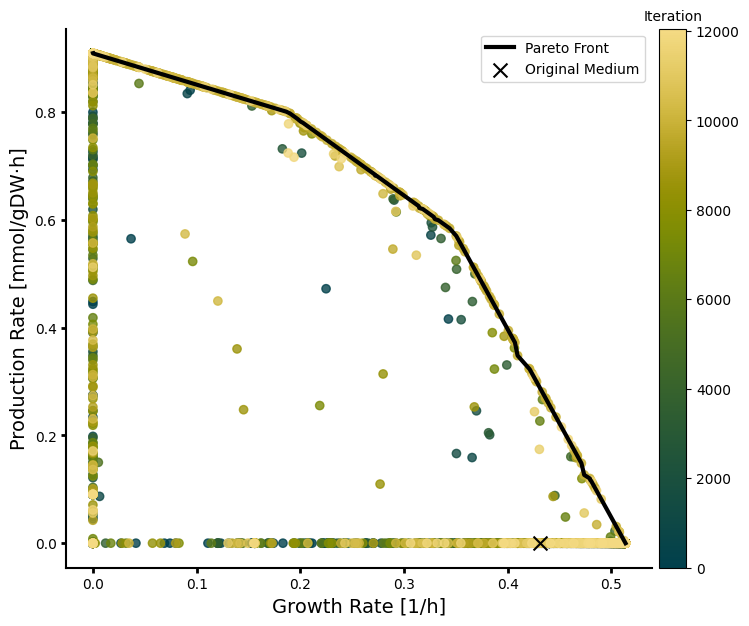

In [2]:
data_4c = pd.read_csv("../data/Figure4C.csv")

# Create the plot with given size
fig, axes = plt.subplots(1, 1, figsize = (9, 7))

# Generate distinct colours
colours = cmaps.bamako.cut(0.05, "right")(np.linspace(0, 1, len(data_4c)))
# Create a custom colourmap for the colour bar
cmap = mcolors.ListedColormap(colours)

# Create an array to store colours for each data point
point_colours = np.arange(len(data_4c))
# Set boundaries between each batch, from -0.5 to n_batch + 0.5
boundaries = np.arange(len(data_4c) +1) - 0.5
norm = mcolors.BoundaryNorm(boundaries, cmap.N)


# Scatter plot with custom colours, applying transparence (alpha = 0.8)    
axes.scatter(
    data_4c["growth_rate"],
    data_4c["production"],
    c = point_colours, 
    cmap = cmap,
    norm = norm,
    alpha = 0.8, zorder=1)

# Extract and sort Pareto points by growth rate
pareto_data = data_4c[data_4c["is_pareto"] == True].sort_values(by = "growth_rate")
# Plot as a single line connecting the points
axes.plot(
    pareto_data["growth_rate"],
    pareto_data["production"],
    label = "Pareto Front",
    color = "black",
    linewidth = 3
)

# plot performance of initial medium
axes.scatter(
    x = data_4c["init_growth_rate"][0],
    y = data_4c["init_production"][0],
    color = "black", marker = "x", 
    label = "Original Medium", s = 100, zorder = 5
    )

# axes
axes.set_xlabel("Growth Rate [1/h]", fontsize = 14)
axes.set_ylabel("Production Rate [mmol/gDW·h]", fontsize = 14)
axes.xaxis.set_tick_params(width = 2, labelsize = 10)
axes.yaxis.set_tick_params(width = 2, labelsize = 10)
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["bottom"].set_linewidth(1.5)
axes.spines["left"].set_linewidth(1.5)

# Add the color bar
tick_positions = [0, 2000, 4000, 6000, 8000, 10000, 12000]
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axes, pad = 0.01, ticks = tick_positions) # pad defines distance
cbar.ax.set_title("Iteration", fontsize = 10)
cbar.ax.tick_params(which = "minor", size = 0) # turn off minor ticks at colour boundaries
    
# Display the legend
axes.legend()
    
# Show the plot
plt.show()

fig.set_size_inches(9, 7)  # Consistent physical size in inches
fig.savefig("../figs/Figure4C.png", dpi = 300, bbox_inches = None)

## D. Box plot of pareto-optimal medium component distributions

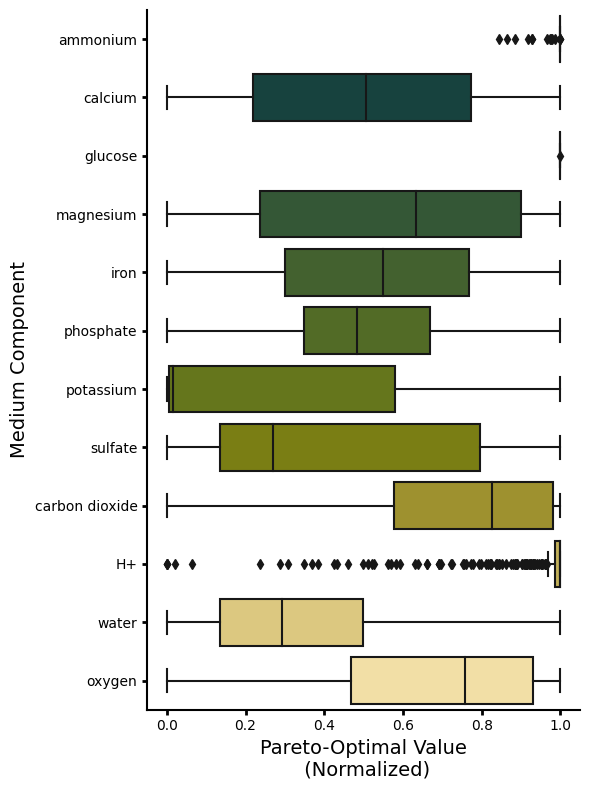

In [3]:
data_4d = pd.read_csv("../data/Figure4D.csv")

pareto = data_4d.loc[data_4d['is pareto'] == True]
pareto = pareto.drop(columns=['growth rate', 'cost', 'production rate', 'is pareto', 'n_candidates'])

#Normalize each exchange column to its min/max values
norm_pareto = pd.DataFrame()
for c in pareto.columns:
    min = data_4d[c].min()
    max = data_4d[c].max()
    norm_pareto[c] = (pareto[c] - min)/(max-min)

norm_pareto = norm_pareto.rename(columns={
        'EX_cpd00013_b': 'ammonium',
        'EX_cpd00063_b': 'calcium', 
        'EX_cpd00027_b': 'glucose',
        'EX_cpd00254_b': 'magnesium',
        'EX_cpd10516_b': 'iron',
        'EX_cpd00009_b': 'phosphate',
        'EX_cpd00205_b': 'potassium',
        'EX_cpd00048_b': 'sulfate',
        'EX_cpd00007_b': 'oxygen',
        'EX_cpd00067_b': 'H+',
        'EX_cpd00001_b': 'water', 
        'EX_cpd00011_b': 'carbon dioxide'
        })

pareto = norm_pareto.melt(var_name='exchange', value_name='flux')

cmap = list(cmaps.bamako(np.linspace(0, 1, 12)))
fig, axes = plt.subplots(figsize=(6, 8))
sns.boxplot(data=pareto, y='exchange', x='flux', palette=cmap)

axes.set_ylabel('Medium Component', fontsize = 14)
axes.set_xlabel(f'Pareto-Optimal Value\n (Normalized)', fontsize = 14)
axes.xaxis.set_tick_params(width = 2, labelsize = 10)
axes.yaxis.set_tick_params(width = 2, labelsize = 10)
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["bottom"].set_linewidth(1.5)
axes.spines["left"].set_linewidth(1.5)
fig.tight_layout()
fig.savefig('../figs/Figure4D.png', dpi = 300, bbox_inches = None)